# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "82db759698c15daf45f70abd9fc6998b694cc049"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [5]:
from aroon_crossover import AroonCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

Uploading strategy 'Aroon Crossover' ... Success.


{'message': 'Strategy saved successfully',
 'strategyId': '856149ce26f74eeab154a00ca29d5b9a',
 'cstcId': 130105}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('ADANI', exchange='NSE')
instrument

[{'id': 86311, 'value': 'NSE:ADANIENT'},
 {'id': 48, 'value': 'NSE:ADANIGAS'},
 {'id': 49, 'value': 'NSE:ADANIGREEN'},
 {'id': 556589, 'value': 'NSE:ADANIGREEN.BE'},
 {'id': 15, 'value': 'NSE:ADANIPORTS'},
 {'id': 50, 'value': 'NSE:ADANIPOWER'},
 {'id': 556590, 'value': 'NSE:ADANIPOWER.BE'},
 {'id': 51, 'value': 'NSE:ADANITRANS'},
 {'id': 556591, 'value': 'NSE:ADANITRANS.BE'},
 {'id': 243426, 'value': 'NSE:ATGL'}]

## Setup Parameters

In [9]:
parameters = {
  'TIME_PERIOD': 12
}

In [10]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:ADANIPOWER', 
    lots=20,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Aroon Crossover' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ Aroon Crossover           │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:ADANIPOWER']        │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 20                        │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 12}       │
├─────────────────────────┼─────────────

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (10)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[2023-08-22 10:11:23+00:00] Logs not available yet. Please retry in sometime.
[2023-08-22 15:41:19] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 15:41:19] Sanity checks on cfg successful.
[2023-08-22 15:41:19] Currency set to "INR"
[2023-08-22 15:41:19] Setting up broker connection...
[2023-08-22 15:41:20] Broker connection has been setup successfully.
[2023-08-22 15:41:20] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '7000.00'
[2023-08-22 15:41:20] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 15:41:20] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 15:41:20] Reading strategy...
[2023-08-22 15:41:21] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  ######

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NSE,ADANIPOWER,2021-08-02 10:15:00+05:30,BUY,20,₹,97.20,2021-08-02 13:15:00+05:30,SELL,20,₹,92.50,-94.0,-94.0
1,NSE,ADANIPOWER,2021-08-02 13:15:00+05:30,SELL,20,₹,92.50,2021-08-02 15:30:00+05:30,BUY,20,₹,92.60,-2.0,-96.0
2,NSE,ADANIPOWER,2021-08-10 09:15:00+05:30,BUY,20,₹,91.00,2021-08-10 14:15:00+05:30,SELL,20,₹,85.85,-103.0,-199.0
3,NSE,ADANIPOWER,2021-08-10 14:15:00+05:30,SELL,20,₹,85.85,2021-08-10 15:30:00+05:30,BUY,20,₹,85.85,0.0,-199.0
4,NSE,ADANIPOWER,2021-08-25 09:15:00+05:30,BUY,20,₹,81.10,2021-08-25 15:30:00+05:30,SELL,20,₹,81.10,0.0,-199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,NSE,ADANIPOWER,2023-07-17 09:15:00+05:30,BUY,20,₹,245.35,2023-07-17 15:30:00+05:30,SELL,20,₹,246.40,21.0,2069.0
205,NSE,ADANIPOWER,2023-07-20 09:15:00+05:30,SELL,20,₹,245.70,2023-07-20 15:30:00+05:30,BUY,20,₹,244.30,28.0,2097.0
206,NSE,ADANIPOWER,2023-07-25 10:15:00+05:30,BUY,20,₹,245.05,2023-07-25 15:30:00+05:30,SELL,20,₹,261.00,319.0,2416.0
207,NSE,ADANIPOWER,2023-07-27 14:15:00+05:30,SELL,20,₹,251.95,2023-07-27 15:30:00+05:30,BUY,20,₹,253.10,-23.0,2393.0


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-28
Risk-Free Rate      0.0%
Time in Market      80.0%

Cumulative Return   36.33%
CAGR﹪              16.89%

Sharpe              2.41
Prob. Sharpe Ratio  98.7%
Sortino             4.15
Sortino/√2          2.93
Omega               1.66

Max Drawdown        -6.32%
Longest DD Days     91

Gain/Pain Ratio     0.75
Gain/Pain (1M)      2.69

Payoff Ratio        1.42
Profit Factor       1.66
Common Sense Ratio  3.53
CPC Index           1.27
Tail Ratio          2.13
Outlier Win Ratio   5.44
Outlier Loss Ratio  4.94

MTD                 3.95%
3M                  3.53%
6M                  6.11%
YTD                 8.06%
1Y                  21.25%
3Y (ann.)           16.89%
5Y (ann.)           16.89%
10Y (ann.)          16.89%
All-time (ann.)     16.89%

Avg. Drawdown       -1.75%
Avg. Drawdown Days  33
Recovery Factor     5.75
Ulcer Index         0.02
Serenity Index      4.37


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-28
Risk-Free Rate             0.0%
Time in Market             80.0%

Cumulative Return          36.33%
CAGR﹪                     16.89%

Sharpe                     2.41
Prob. Sharpe Ratio         98.7%
Smart Sharpe               2.19
Sortino                    4.15
Smart Sortino              3.78
Sortino/√2                 2.93
Smart Sortino/√2           2.67
Omega                      1.66

Max Drawdown               -6.32%
Longest DD Days            91
Volatility (ann.)          16.04%
Calmar                     2.67
Skew                       0.31
Kurtosis                   3.53

Expected Daily %           0.15%
Expected Monthly %         1.3%
Expected Yearly %          10.88%
Kelly Criterion            21.43%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.51%
Expected Shortfall (cVaR)  -1.51%

Max Consecutive Wins       5


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-06-03,2022-06-30,2022-08-16,74,-6.318377,-6.133989
2,2022-10-18,2022-12-08,2023-01-09,83,-4.413251,-4.233577
3,2023-01-16,2023-01-20,2023-03-31,74,-2.771902,-2.337749
4,2022-04-19,2022-05-02,2022-05-06,17,-2.759494,-1.582278
5,2021-10-22,2022-01-17,2022-01-21,91,-2.559337,-1.844438


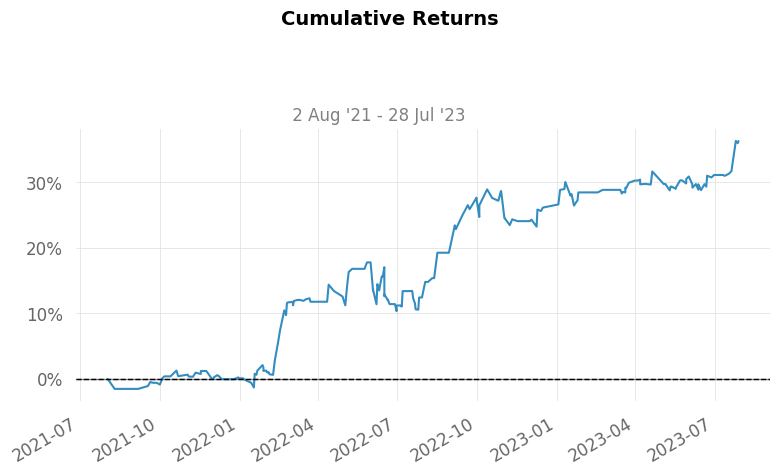

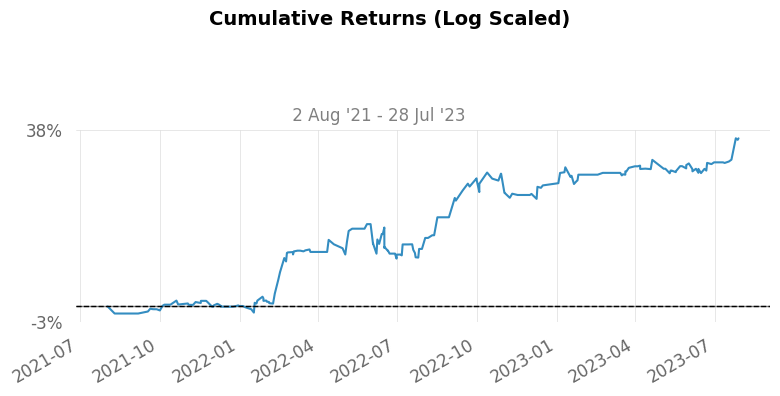

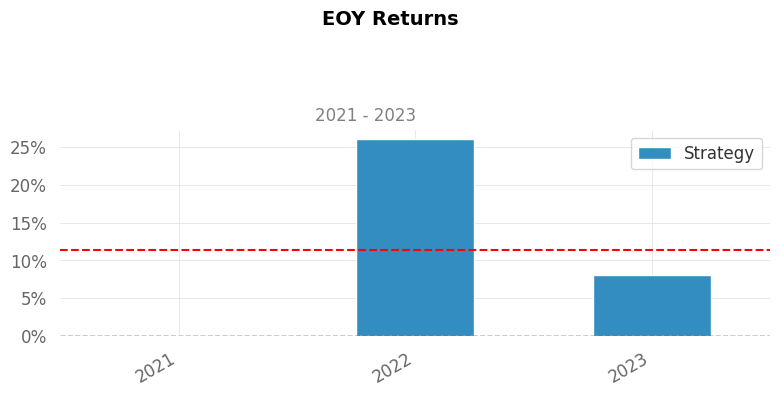

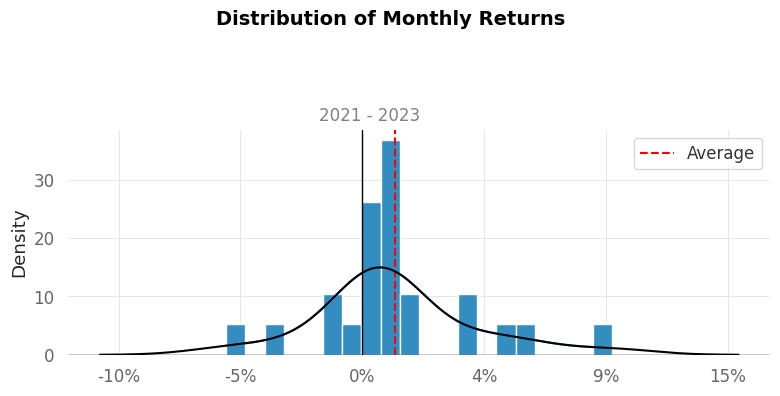

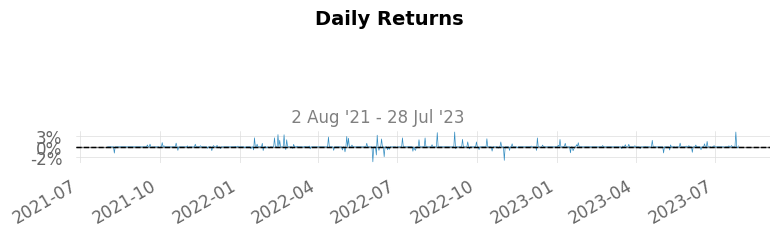

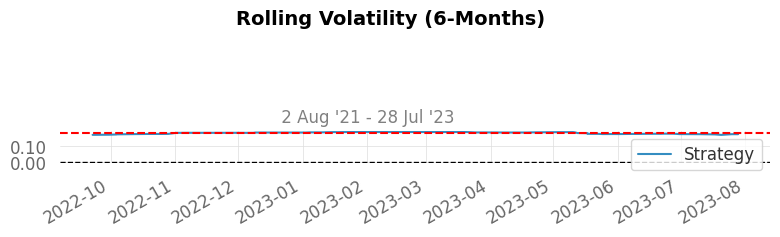

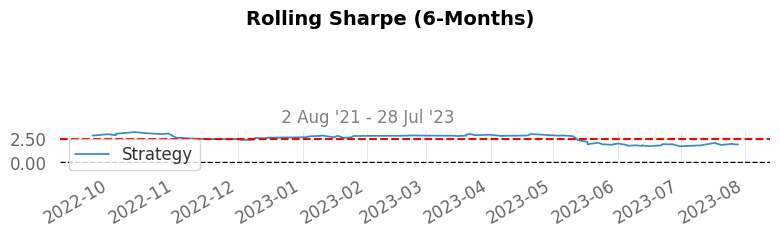

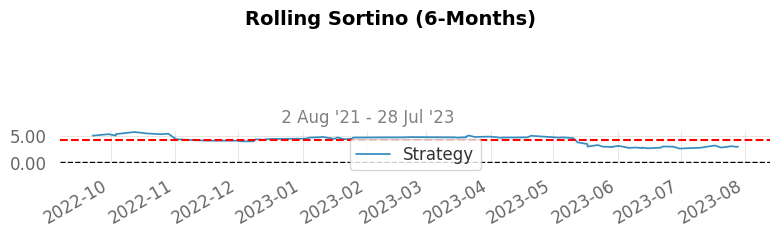

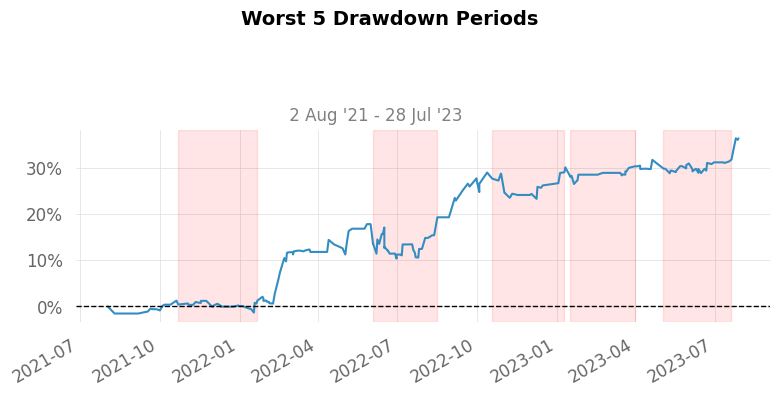

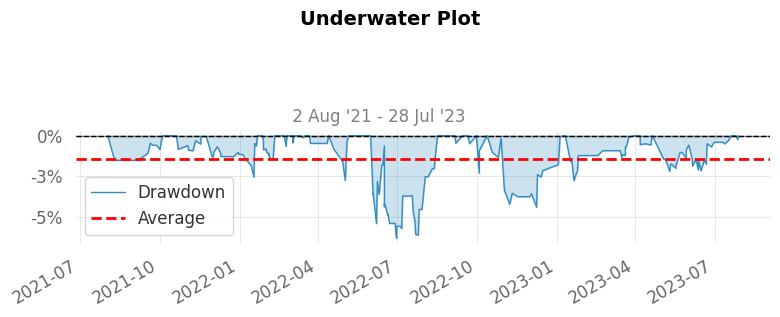

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


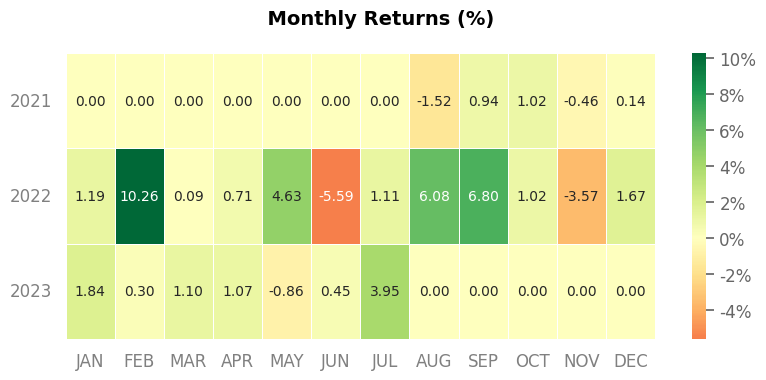

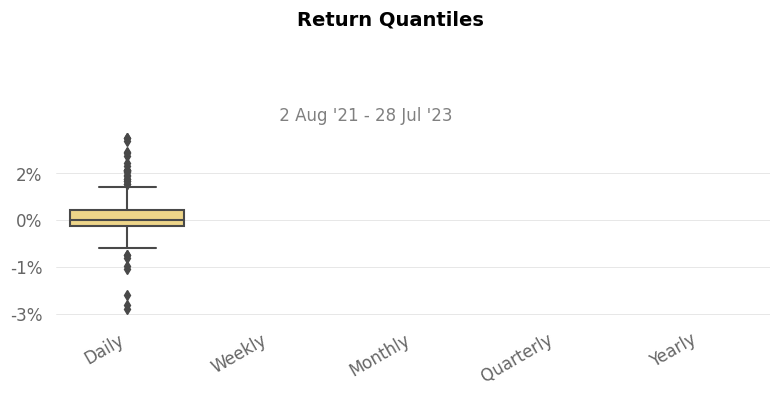

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+-------------------+---------------------------+----------------------------------+------+
| INST              | TIME                      | ID                               | TT   |
|-------------------+---------------------------+----------------------------------+------|
| NSE_EQ:ADANIPOWER | 2021-08-02 10:15:00+05:30 | 6df4feb85e56412cb52bd536b943db78 | BUY  |
+-------------------+---------------------------+----------------------------------+------+
+----+---------------------------+------------------------+-------+
|    | TIME                      | STATE                  | MSG   |
|----+---------------------------+------------------------+-------|
|  0 | 2021-08-02 10:15:00+05:30 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-02 10:15:00+05:30 | VALIDATION PENDING     |       |
|  2 | 2021-08-02 10:15:00+05:30 | OPEN PENDING           |       |
|  3 | 2021-08-02 10:15:00+05:30 | OPEN                   |       |
|  4 | 2021-08-02 10:15:00+05:30 | COMPLETE               |   

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:ADANIPOWER', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---